In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train_test_data/train.csv')

In [3]:
def data_overview(df):
    print("Rows :  ", df.shape[0])
    print("Columns:  ", df.shape[1])
    print()
    print("Feature types:  ")
    print(df.dtypes)
    print()
    print('Missing values : ')
    print(df.isnull().sum())
    print()
    print('Unique values:')
    print(df.nunique())

In [4]:
data_overview(train)  
# all numerical, no missing value, very clean dataset!
# maybe some features are categorical

Rows :   12096
Columns:   56

Feature types:  
Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                   

In [5]:
# drop useless features
to_drop=['Id','Soil_Type7','Soil_Type15']

In [6]:
# check y_label 
# 1 - Spruce/Fir
# 2 - Lodgepole Pine
# 3 - Ponderosa Pine
# 4 - Cottonwood/Willow
# 5 - Aspen
# 6 - Douglas-fir
# 7 - Krummholz
train.Cover_Type.value_counts()  # already encoded, fairly balanced!

6    1749
5    1742
7    1741
1    1726
3    1723
4    1713
2    1702
Name: Cover_Type, dtype: int64

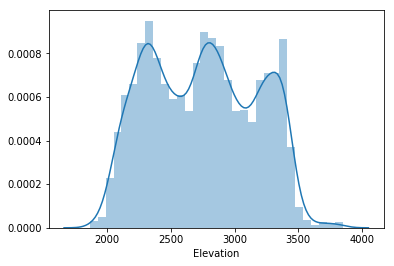

In [7]:
# Elevation - Elevation in meters
sns.distplot(train.Elevation) 

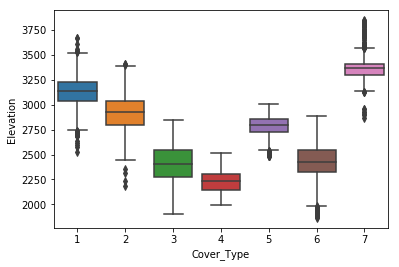

In [8]:
sns.boxplot(x='Cover_Type',y='Elevation',data=train) # huge impact on y

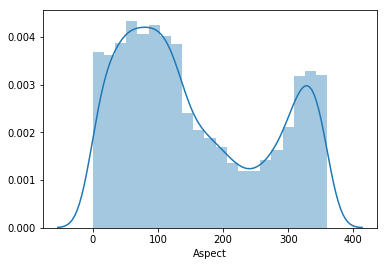

In [9]:
# Aspect - Aspect in degrees azimuth
sns.distplot(train.Aspect) # 0-360 degrees!

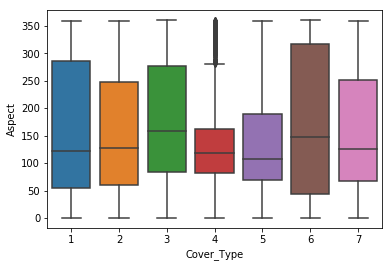

In [10]:
sns.boxplot(x='Cover_Type',y='Aspect',data=train) # obvious impact on y

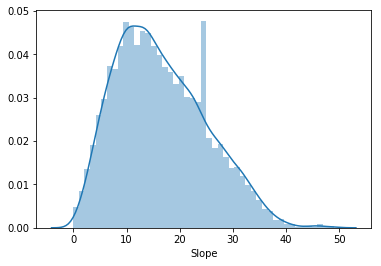

In [11]:
# Slope - Slope in degrees
sns.distplot(train.Slope)  # positive skewness

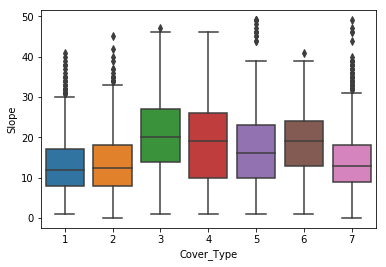

In [12]:
sns.boxplot(x='Cover_Type',y='Slope',data=train) # slight impact on y

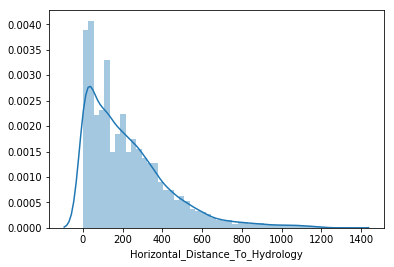

In [13]:
# Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
sns.distplot(train.Horizontal_Distance_To_Hydrology) # positive skewness

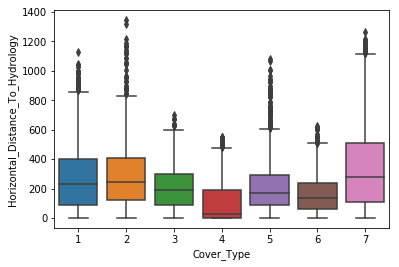

In [14]:
sns.boxplot(x='Cover_Type',y='Horizontal_Distance_To_Hydrology',data=train) # obvious impact on y

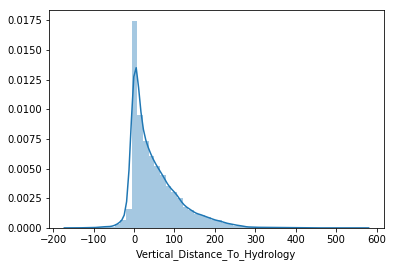

In [15]:
# Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
sns.distplot(train.Vertical_Distance_To_Hydrology) # positive skewness

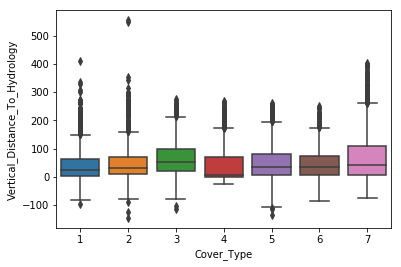

In [16]:
sns.boxplot(x='Cover_Type',y='Vertical_Distance_To_Hydrology',data=train) # slight impact on y

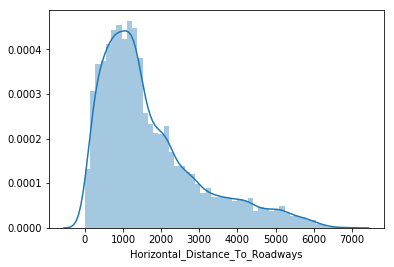

In [17]:
# Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
sns.distplot(train.Horizontal_Distance_To_Roadways) # positive skewness

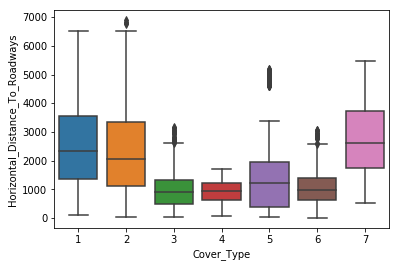

In [18]:
sns.boxplot(x='Cover_Type',y='Horizontal_Distance_To_Roadways',data=train) # huge impact on y

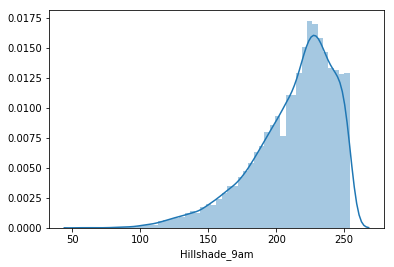

In [19]:
# Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
sns.distplot(train.Hillshade_9am) # negetive skewness

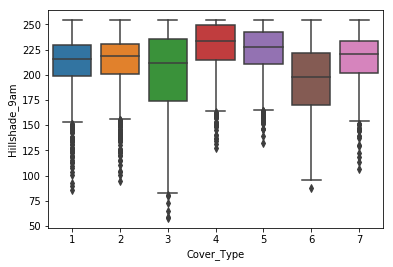

In [20]:
sns.boxplot(x='Cover_Type',y='Hillshade_9am',data=train) # slight impact on y

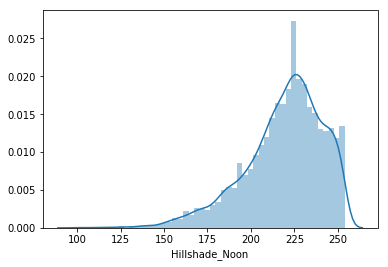

In [21]:
# Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
sns.distplot(train.Hillshade_Noon) # negetive skewness

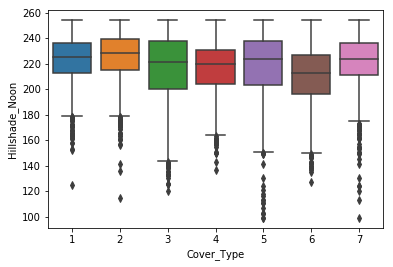

In [22]:
sns.boxplot(x='Cover_Type',y='Hillshade_Noon',data=train) # slight impact on y

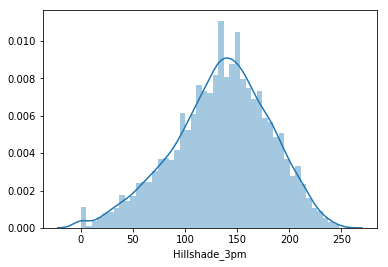

In [23]:
# Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
sns.distplot(train.Hillshade_3pm) 

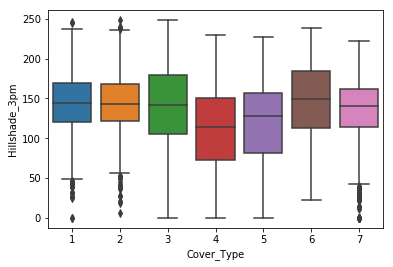

In [24]:
sns.boxplot(x='Cover_Type',y='Hillshade_3pm',data=train) # slight impact on y

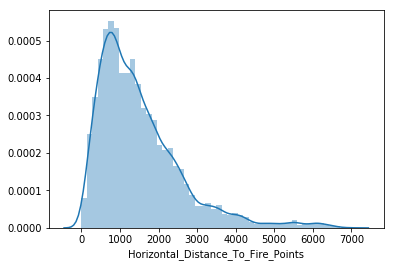

In [25]:
# Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
sns.distplot(train.Horizontal_Distance_To_Fire_Points) # positive skewness

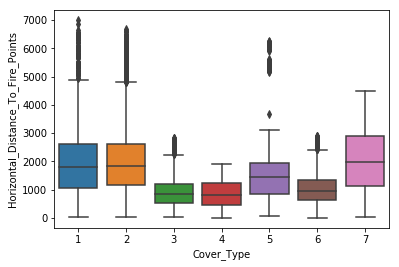

In [26]:
sns.boxplot(x='Cover_Type',y='Horizontal_Distance_To_Fire_Points',data=train) # obvious impact on y

In [27]:
num_col = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
          'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

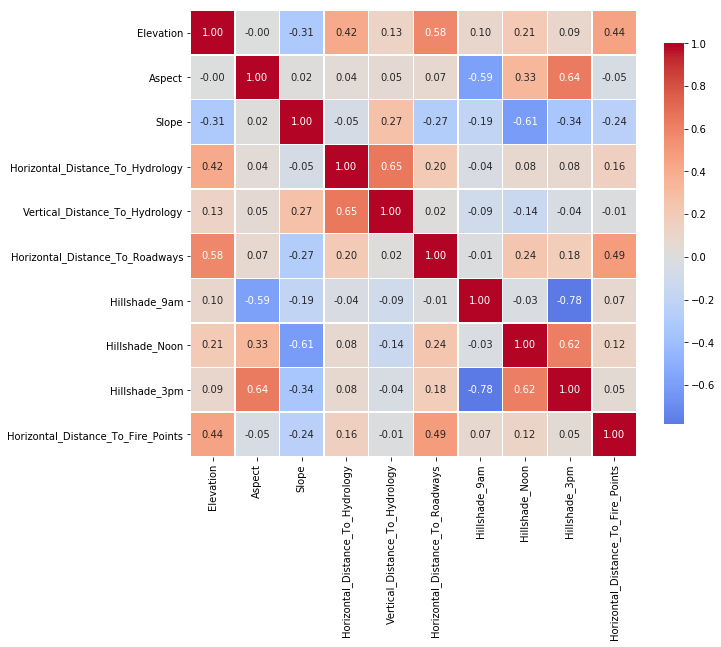

In [28]:
# method{‘pearson’, ‘kendall’, ‘spearman’}
correlations = train[num_col].corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='coolwarm')
plt.show()

# medium positive correlations > 0.6 :
# Vertical_Distance_To_Hydrology & Horizontal_Distance_To_Hydrology 
# Hillshade_3pm & Aspect
# Hillshade_3pm & Hillshade_Noon

# medium negative correlations < -0.6:
# Hillshade_3pm & Hillshade_9am

# idea: drop Hillshade_3pm, Vertical_Distance_To_Hydrology

In [30]:
num_col.remove('Hillshade_3pm')
num_col.remove('Vertical_Distance_To_Hydrology')

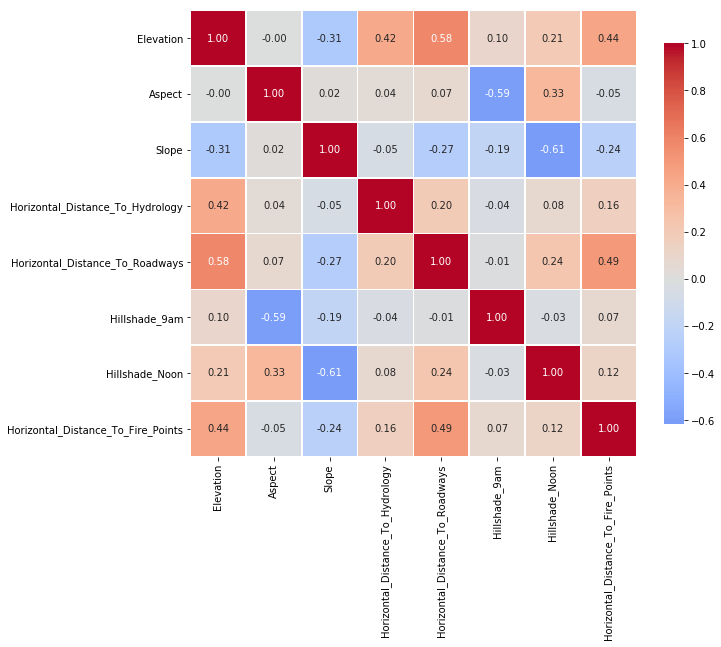

In [31]:
correlations = train[num_col].corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='coolwarm')
plt.show()